# Лабораторная работа №3. Метрические методы классификации.

__Цель лабораторной работы__: изучение принципов построения информационных систем с использованием метрических методов классификации.

## Методика выполнения работы

1. Студент самостоятельно выбирает набор данных на ресурсах [3, 4] для построения классификатора с использованием метода ближайших соседей и согласует свой выбор с преподавателем.

2. Выполните построение модели классификации на основе метода ближайших соседей. В ходе решения задачи необходимо решить следующие подзадачи:

In [2]:
# Загрузка данных

import pandas as pd
import numpy as np

data_source = 'rice.data'
data = pd.read_table(data_source, delimiter=',', header=None, names=[
    'Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class'
])
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


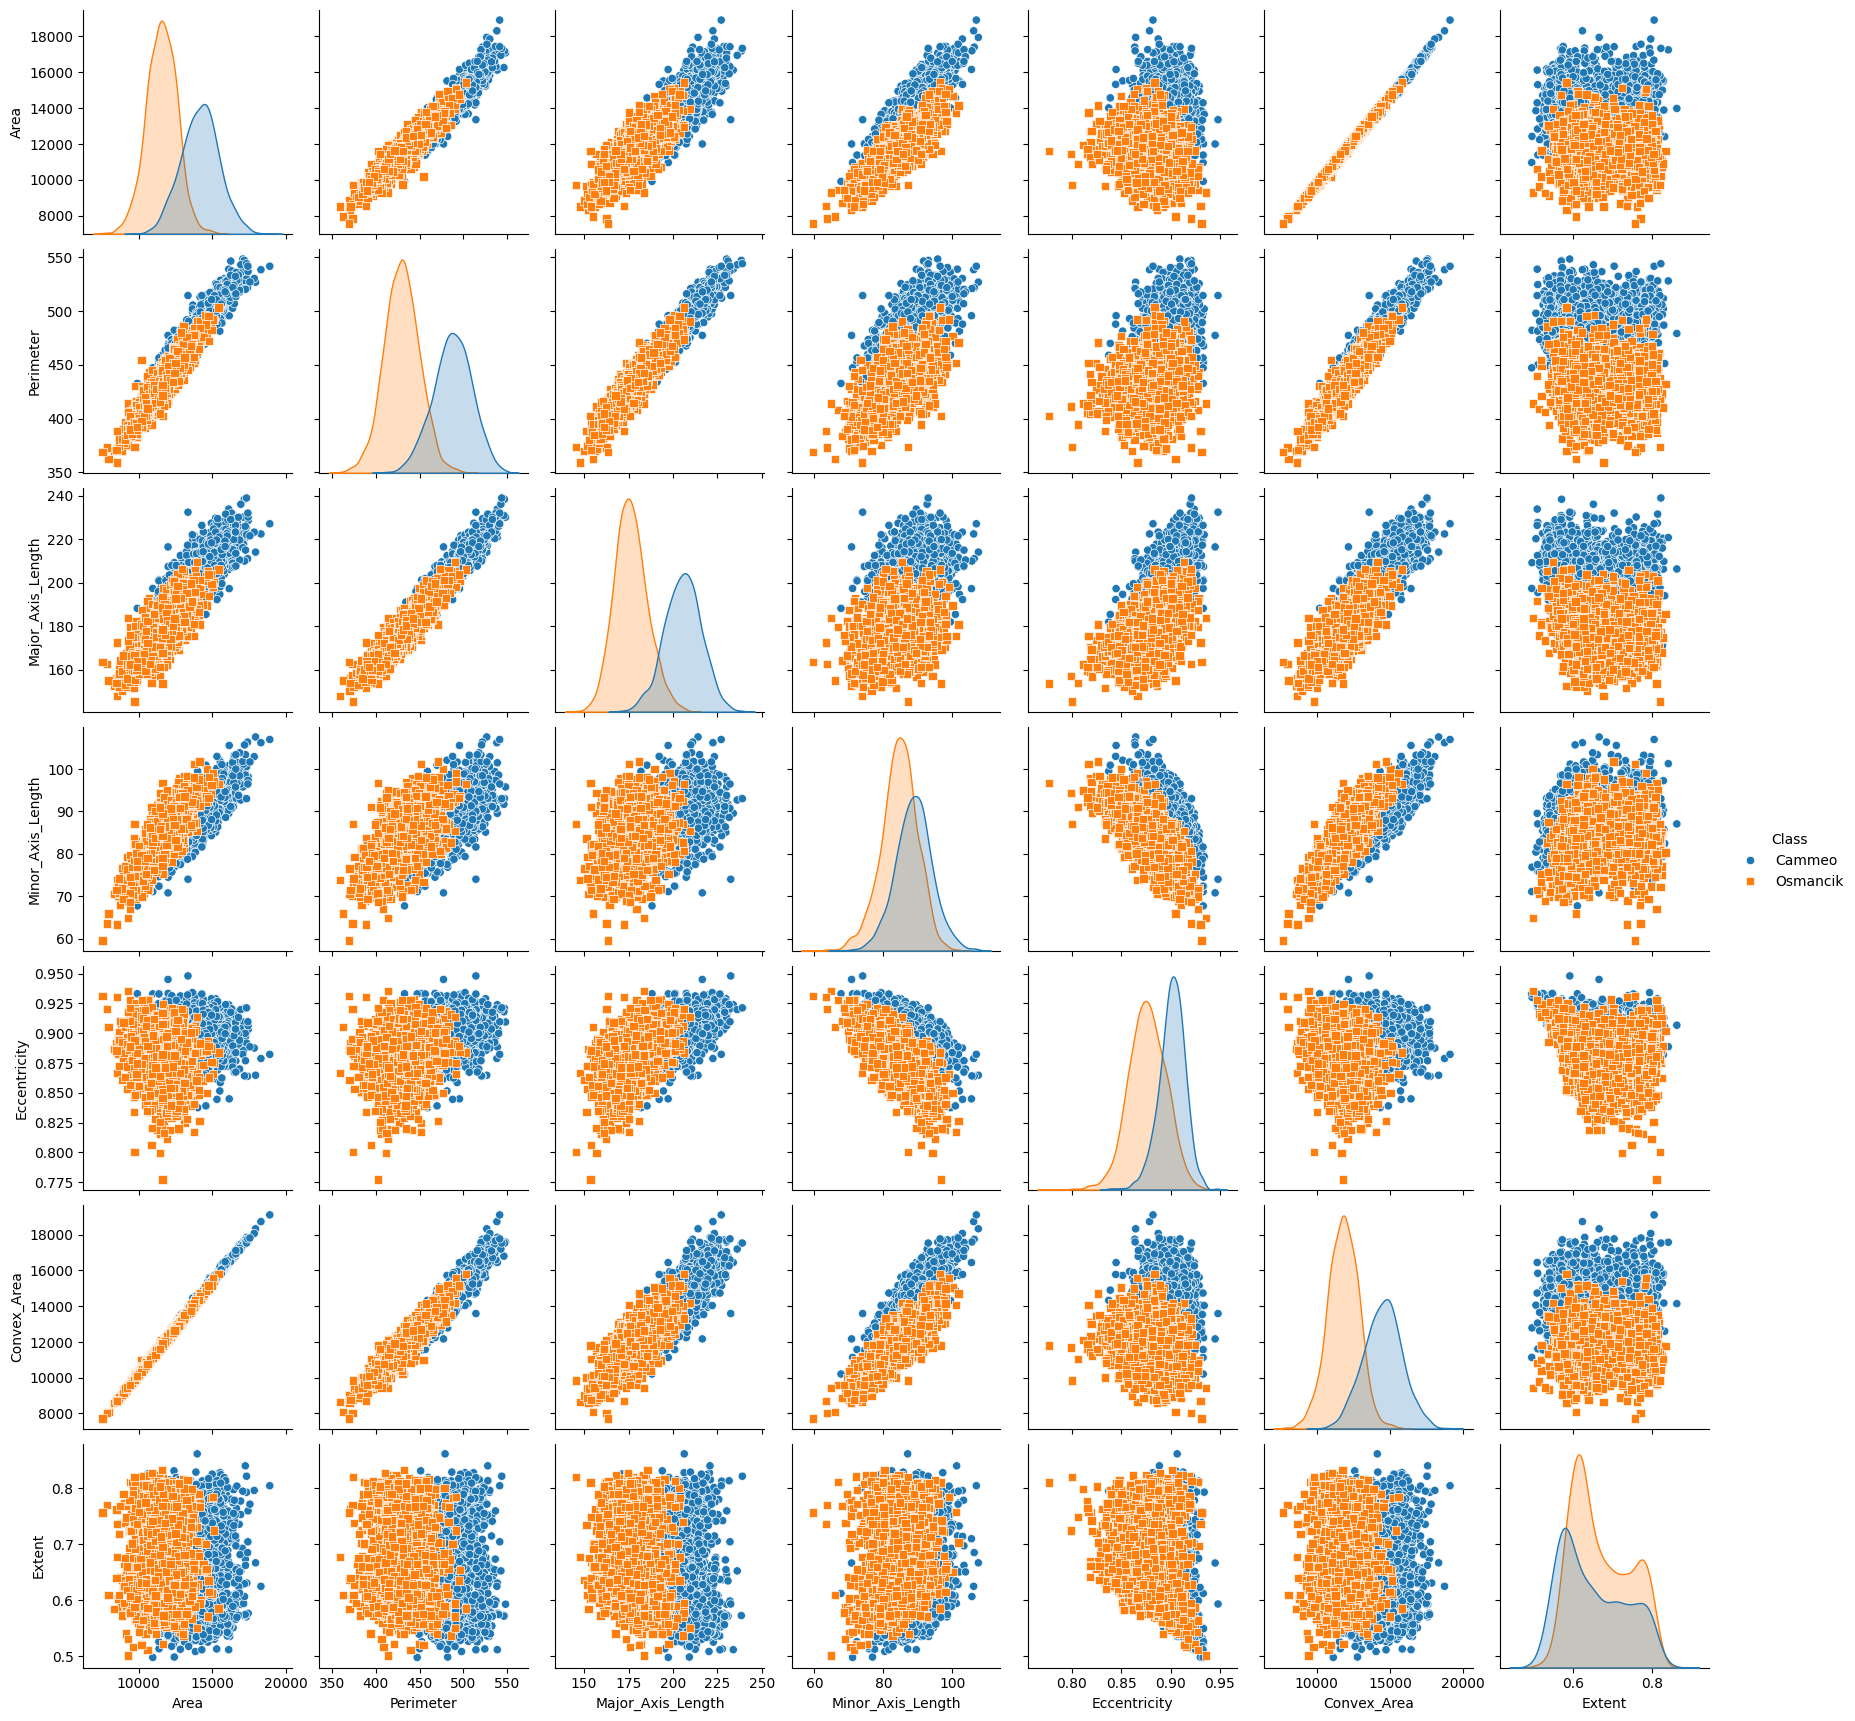

In [3]:
import seaborn as sb
%matplotlib inline
sb.pairplot(data, hue='Class', markers=["o", "s"])

- Построение классификатора с заданием K (количества ближайших
соседей) пользователем;

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train = data[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']]
y_train = data['Class']
k = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=k)

# Построение модели классификатора
knn.fit(x_train, y_train)

# Использование классификатора
# Объявление признаков объекта
x_test = np.array([[1400, 560, 200, 85, 0.8, 1500, 0.59]])

# Получение ответа для нового объекта
target = knn.predict(x_test)
print(target)

['Osmancik']


/home/magomedov/Work/AIandML/lr_3/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


* Вычисление оценки hold-out для различных значений K, а также для
различных долей обучающей и тестирующей подвыборок;

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step


accur_list = []

for k in range(1, 20):
    for ts in frange(0.1, 0.9, 0.1):
        x_train, x_holdout, y_train, y_holdout   = train_test_split(data[
            ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']],
            data['Class'],
            test_size=ts,
            random_state=17
            )
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        knn_pred = knn.predict(x_holdout)
        accur = accuracy_score(y_holdout, knn_pred)
        accur_list.append((accur, k, ts))

max_accur = [i[0] for i in accur_list]
print(accur_list[max_accur.index(max(max_accur))])

(0.910761154855643, 12, 0.1)


* Вычисление оценки cross validation для различных значений K, а также для различных значений fold (количества подмножеств при кросс-валидации).

In [6]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt

# Значение параметра k
k_list = list(range(1, 20))

# Пустой список для хранения значений точности
cv_scores = []

# В цикле проходим все значений точности
for k in k_list:
    # В циклу проходим по значениям cv
    for fold in range(2, 20):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, data.iloc[ : , 0:7 ], data['Class'], cv=fold, scoring='accuracy')
        cv_scores.append((scores.mean(), k, fold))

# Вычисляем ошибку
MSE = [1-x[0] for x in cv_scores]

# # Строим график
# plt.plot(k_list, MSE)
# plt.xlabel(f'Количество соседей (K)')
# plt.ylabel('Ошибка классификации (MSE)')
# plt.show

k_min = min(MSE)

# Пробуем найти прочие минимумы
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(cv_scores[i])

print(all_k_min)

[(0.8889763779527559, 3, 6)]


* Вычислите оптимальные значения K. Обоснуйте свой выбор. Продемонстрируйте использование полученного классификатора.

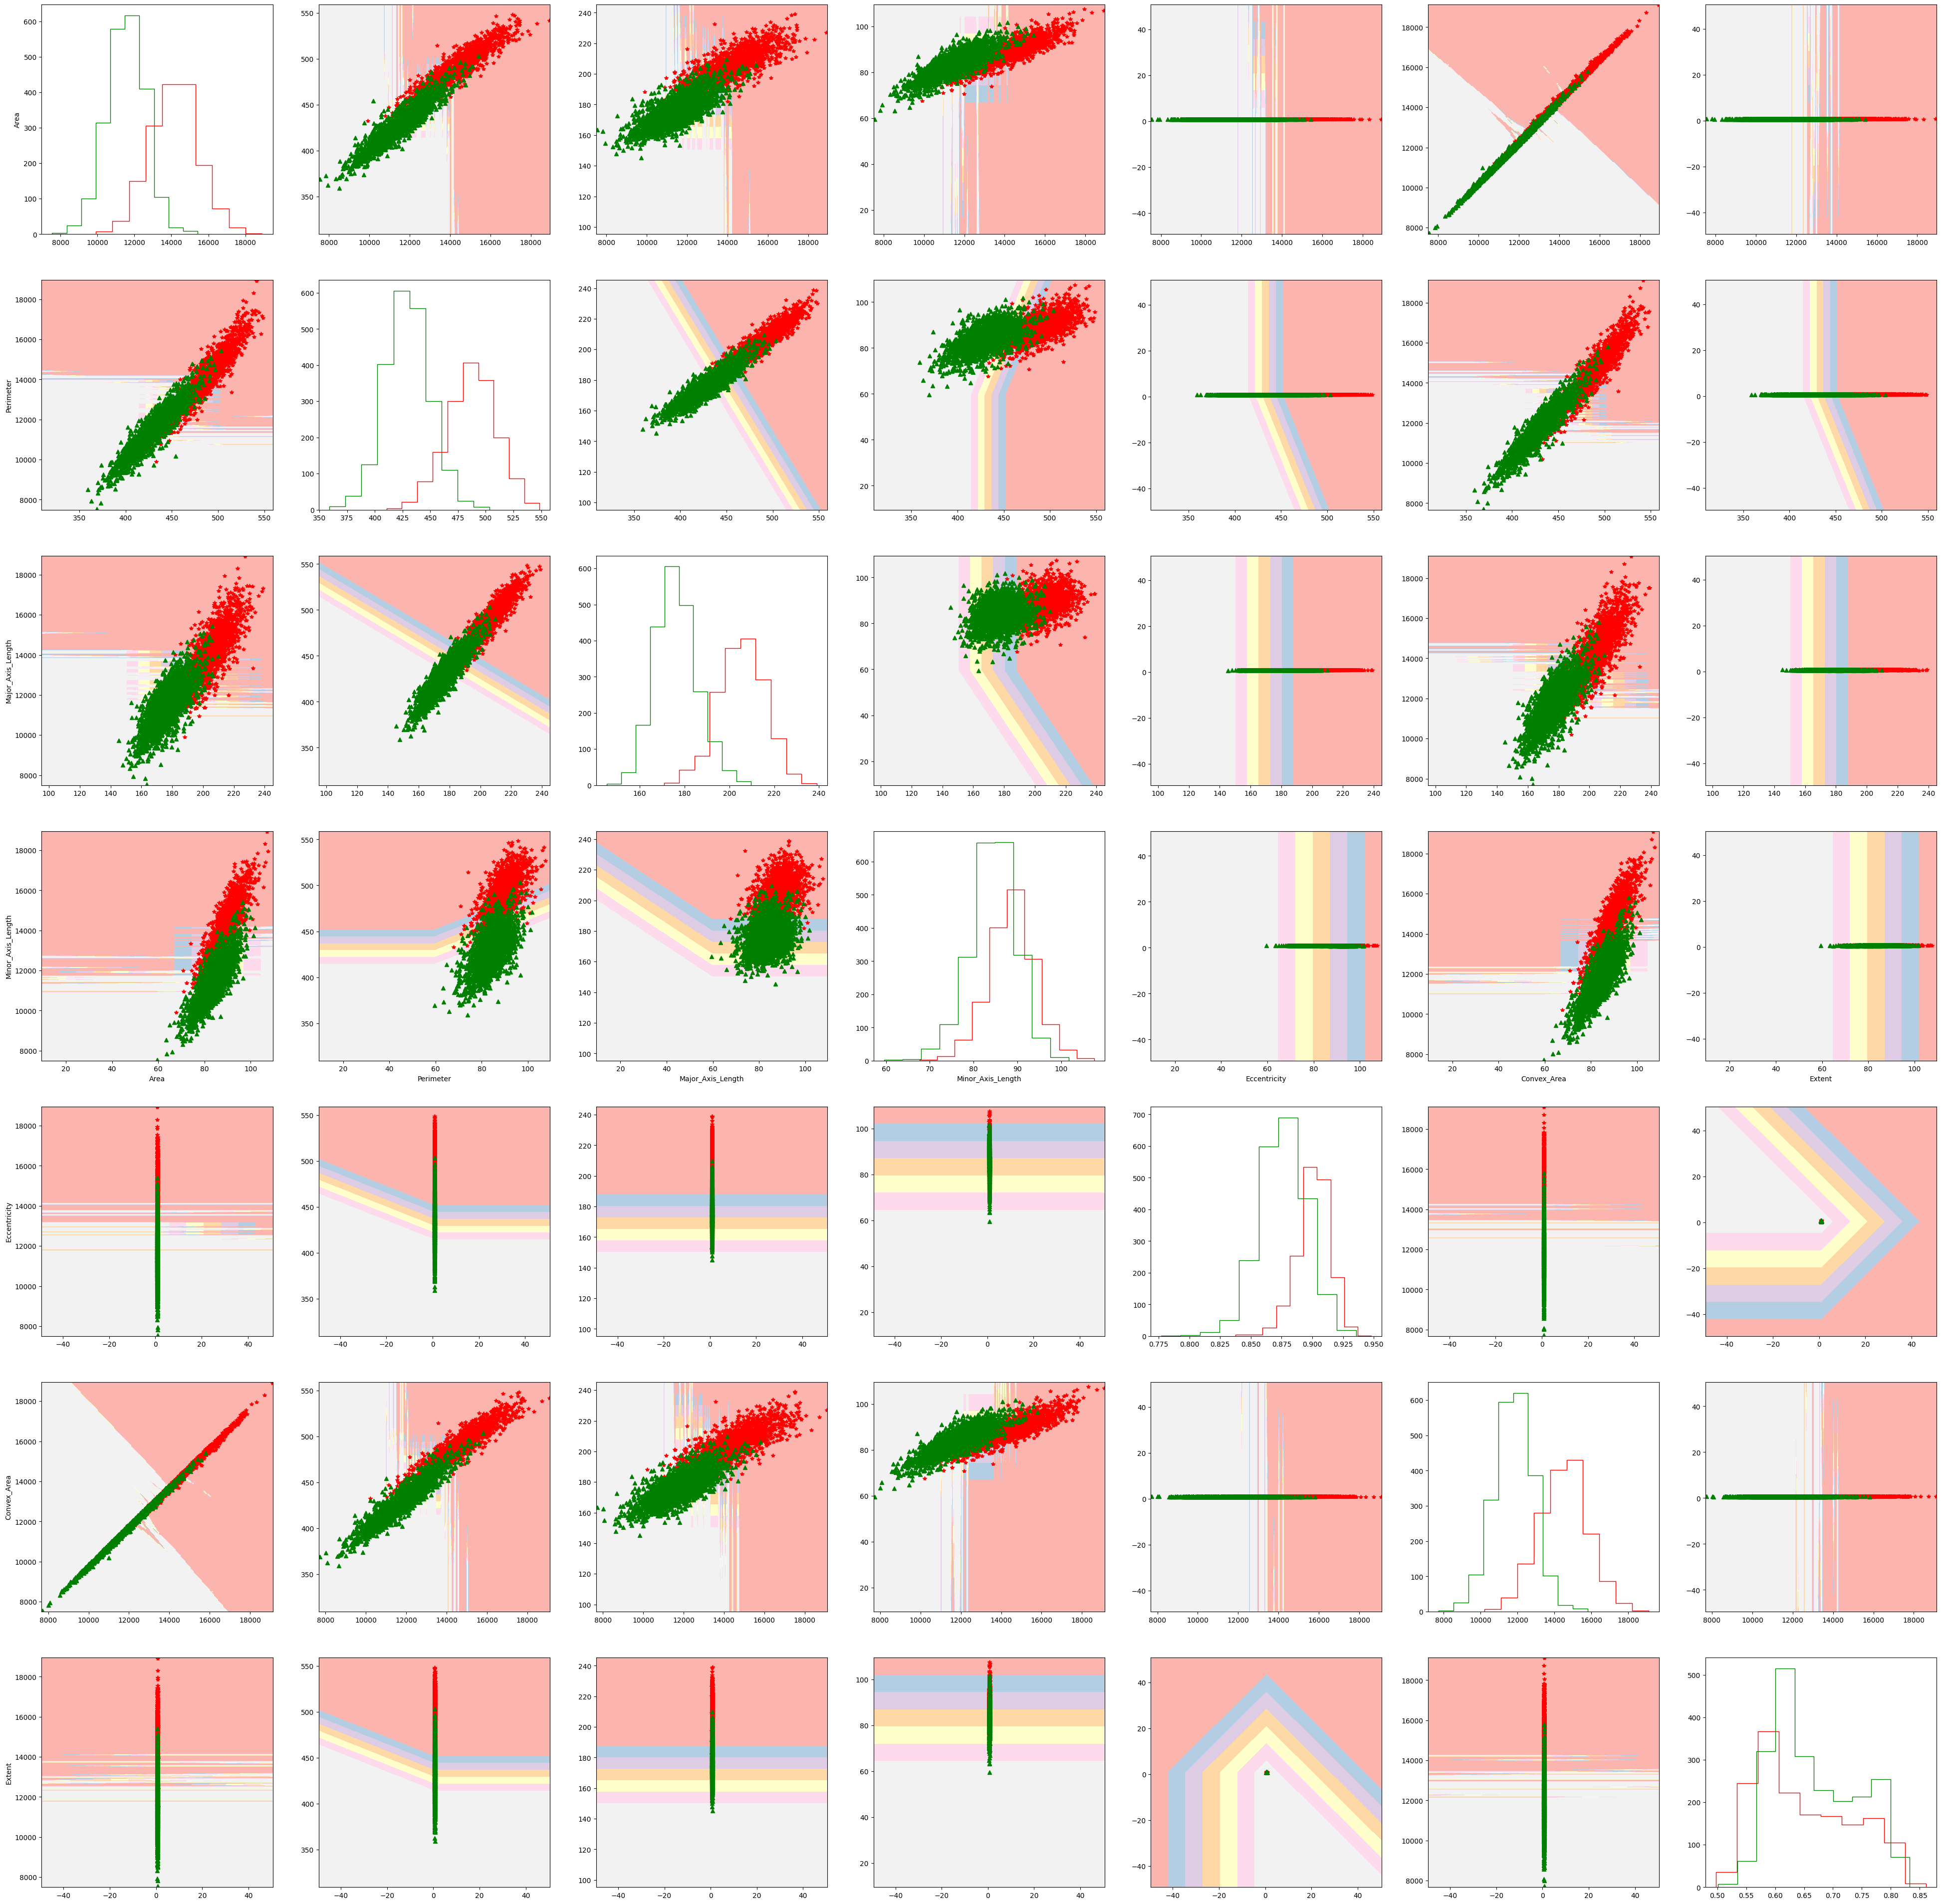

In [11]:
dX = data.iloc[:,0:7]
dy = data['Class']

plot_markers = ['r*', 'g^']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(7, 7, figsize=(49,49))

fmin = dX.min()-50
fmax = dX.max()+50
plot_step = 50

# Обходим все subplot
for i in range(0,7):
    for j in range(0,7):

        # Строим решающие границы
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin.iloc[i], fmax.iloc[i], plot_step),
                               np.arange(fmin.iloc[j], fmax.iloc[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=3)
            model.fit(dX.iloc[:, [i,j]].values, dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p=p.astype('int32')
            places[i,j].contourf(xx, yy, p, cmap='Pastel1')

        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)

        if j==0:
            places[i, j].set_ylabel(dX.columns[i])

        if i==3:
            places[i, j].set_xlabel(dX.columns[j])


## Контрольные вопросы

1. Особенности основных методов метрической классификации:
    - Метод ближайшего соседа (Nearest Neighbor, NN):
    
        Принцип: Класс нового объекта определяется классом его наиболее близкого объекта из обучающего набора.

        Плюсы:
        - Простая реализация.
        - Не требует предварительной подготовки данных.
        - Хорошо работает с шумовыми данными.

        Минусы:
        - Чувствителен к выбросам.
        - Выбор метрики расстояния может быть критичным.
        - Низкая вычислительная эффективность для больших наборов данных.

    - Метод k ближайших соседей (k-Nearest Neighbors, kNN):

        Принцип: Класс нового объекта определяется мажоритарным голосованием его k ближайших соседей из обучающего набора.

        Плюсы:
        - Более устойчив к выбросам, чем NN.
        - Может учитывать локальную структуру данных.
        - Относительно простая реализация.

        Минусы:
        - Выбор параметра k может быть критичным.
        - Низкая вычислительная эффективность для больших наборов данных.
        - Чувствителен к масштабированию признаков.

2. Основные принципы и этапы реализации метода kNN:
    
    Принципы:
    - Гипотеза компактности: объекты, близкие в пространстве признаков, с большой вероятностью принадлежат одному классу.
    - Голосование: класс нового объекта определяется по мажоритарному голосованию его k ближайших соседей.

    Этапы реализации:
    - Выбор метрики расстояния: определяет, как вычислять расстояние между объектами.
    - Поиск k ближайших соседей: для нового объекта найти k объектов из обучающего набора, которые находятся к нему ближе всего.
    - Определение класса: класс нового объекта - это наиболее распространенный класс среди k ближайших соседей.

3. Принцип выбора количества соседних объектов (k):
    
    Влияние k:
    - Малое k: приводит к переобучению и высокой чувствительности к шуму.
    - Большое k: приводит к недообучению и игнорированию локальной структуры данных.

    Выбор k:
    - Перекрестная проверка: оценка разных значений k на подмножестве данных.
    - Эвристические методы: выбор k на основе анализа данных.
    - Алгоритмы автоматического выбора k: методы, которые автоматически выбирают оптимальное значение k.

4. Метод парзеновского окна:
    
    Принцип: для нового объекта вычисляется плотность распределения классов в его окрестности.

    Класс объекта: определяется классом с наибольшей плотностью в его окрестности.

    Плотность: оценивается с помощью функции парзеновского окна, которая учитывает расстояния до объектов из обучающего набора.

5. Принцип метода потенциальных функций:

    Функция потенциала: каждому классу присваивается потенциальная функция, которая вычисляется для каждого объекта.

    Класс объекта: определяется классом, для которого потенциальная функция имеет максимальное значение.

    Значения функции: отражают "привлекательность" объекта к тому или иному классу.

6. Оптимизируемые параметры в методах kNN:

    Метрика расстояния: выбор метрики, которая определяет, как вычислять расстояние между объектами.

    Количество соседей (k): выбор оптимального значения k, влияющего на точность классификации.

    Метод сглаживания: выбор метода сглаживания плотности распределения классов в окрестности нового объекта (в методе парзеновского окна).

    Параметры функции потенциала: выбор параметров функции потенциала, влияющих на "привлекательность" объекта к тому или иному классу (в методе потенциальных функций).